# Домашнее задание NLP 1
Откуда берутся датасеты

**Цель:**
В этом ДЗ вы напишите свой парсер, который будет бегать по страничкам и автоматически что-то собирать.

<hr>

**Описание/Пошаговая инструкция выполнения домашнего задания:**
1. По аналогии с занятием по парсингу данных, возьмите интересующий вас сайт, на котором можно пособирать какие-то данные (и при этом API не предоставляется). Идеальный датасет должен иметь текстовое описание некоторого объекта и некоторую целевую переменную, соответствующую этому объекту. 

2. Посчитать статистики по собранным данным и провести EDA собранных данных (в случае, если данные представляют собой текст - посчитать частотности слов, выявить наиболее частотные слова и т. п). Не забудьте сохранить полученный датасет, он вам еще пригодиться в дальнейших домашних заданиях.

<hr>

**Критерии оценки:**
1. Написан парсер- 4 балла
2. Написан парсер и собран датасет - 8 баллов
3. Проведен EDA собранных данных - 2 балла

# Часть 1. Парсинг.

Для сбора информации я использовала сайт с отзывами на рестораны Москвы https://www.restoran.ru/msk/opinions/.

Начала я собирать данные 13 июня 2023, сайт содержит информацию начиная от 2008 года, но я решила собрать данные только с первых 1000 страниц (это до начала 2016 года), так как за более ранние периоды не имеет особо смысла собирать данные - многих ресторанов уже нет!

Отзыв выглядит следующим образом:

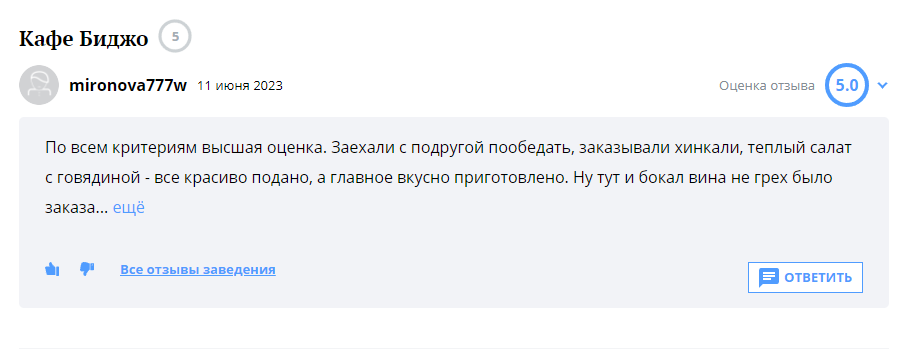

Из отзыва будем собирать имя пользователя, дату, оценку, название ресторана, краткую и полную версию отзыва.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import fake_useragent
import warnings
warnings.filterwarnings("ignore")

ua = fake_useragent.UserAgent()

In [2]:
tot_pages = 1000
log_frequency = 50

def get_review():
    for page in range(1, tot_pages + 1):
        if page % log_frequency == 0:
            print(f'Log: working over page {page}...')
        
        url = f'https://www.restoran.ru/msk/opinions/?PAGEN_1={page}'
        response = requests.get(url, headers = {'user-agent': ua.random})
        soup = BeautifulSoup(response.content, 'lxml')
        data = soup.find_all(attrs = {'class': 'review-wrap'})
        
        for review in data:
            try:
                user = review.find(class_ = 'user-name').text
                user = user.replace('\n','')
            except:
                user = ''
            
            try:
                date = review.find(class_ = 'review-date').text
            except:
                date = ''
                
            try:
                rating = review.find(class_ = 'review-rating-wrap').text
                rating = rating[-3:]
            except: 
                rating = ''
                
            try:
                place = review.find('a').text            
            except:
                place = ''
            
            try:
                summary_short = review.find(class_ = 'review-text-preview').text
                summary_short = summary_short.replace('\n','')
            except:
                summary_short = ''                
            
            try:
                summary_full = review.find(class_ = 'review-text-full').text
                summary_full = summary_full.replace('\n','')
            except:
                summary_full = ''
    
            yield user, date, rating, place, summary_short, summary_full

In [3]:
df_columns = ['user', 'date', 'rating', 'place', 'summary_short', 'summary_full']
df = pd.DataFrame(columns = df_columns)
counter = 0
save_frequency = 1000

try:
    for item in get_review():
        data = []
        for i in range(len(df_columns)):
            data.append(item[i])
        df.loc[len(df.index)] = data
        #time.sleep(0.05)

        counter += 1
        if counter % save_frequency == 0:
            df.to_csv('rest_reviews.csv')
            print(f'{counter} reviews saved in csv..')
except:
    print(f'Error with processing, stopped with line {counter}')

df.to_csv('rest_reviews.csv')

print(f'\nTotal reviews saved {counter}')  

Log: working over page 50...
1000 reviews saved in csv..
Log: working over page 100...
2000 reviews saved in csv..
Log: working over page 150...
3000 reviews saved in csv..
Log: working over page 200...
4000 reviews saved in csv..
Log: working over page 250...
5000 reviews saved in csv..
Log: working over page 300...
6000 reviews saved in csv..
Log: working over page 350...
7000 reviews saved in csv..
Log: working over page 400...
8000 reviews saved in csv..
Log: working over page 450...
9000 reviews saved in csv..
Log: working over page 500...
10000 reviews saved in csv..
Log: working over page 550...
11000 reviews saved in csv..
Log: working over page 600...
12000 reviews saved in csv..
Log: working over page 650...
13000 reviews saved in csv..
Log: working over page 700...
14000 reviews saved in csv..
Log: working over page 750...
15000 reviews saved in csv..
Log: working over page 800...
16000 reviews saved in csv..
Log: working over page 850...
17000 reviews saved in csv..
Log: wo

In [4]:
df

,user,date,rating,place,summary_short,summary_full
0,Sasha,14 июня 2023,5.0,Караоке-бар DUETS,"Мы с девушкой праздновали годовщину в Duets, в...","Мы с девушкой праздновали годовщину в Duets, в..."
1,Дмитрий,13 июня 2023,5.0,Ресторан Tutta La Vita / Тутта Ла Вита,"Уютный ресторанчик, можно прийти на завтрак да...",
2,Артём,13 июня 2023,5.0,Бар Virgins / Верджинс,"Не ходок в ночные заведенения, но был на дне р...","Не ходок в ночные заведенения, но был на дне р..."
3,mironova777w,11 июня 2023,5.0,Кафе Биджо,По всем критериям высшая оценка. Заехали с под...,По всем критериям высшая оценка. Заехали с под...
4,Евгения,11 июня 2023,5.0,Ресторан Генацвале на Арбате,"Очень понравилось. Атмосфера волшебная, улочки...","Очень понравилось. Атмосфера волшебная, улочки..."
...,...,...,...,...,...,...
19995,fatyaka,26 января 2016,5.0,Ресторан Пятый Океан (закрыт),"Здраствуйте пятый океан!!! Спачибо вам , мне т...","Здраствуйте пятый океан!!! Спачибо вам , мне т..."
19996,cerepushkin,26 января 2016,5.0,Ресторан Вечера на хуторе. Корчма,"Были в ресторане Вечера на хуторе, отмечали се...",
19997,КостяМитрофан,26 января 2016,5.0,Ресторан Самарканd (Алтуфьево),"был в ресторане сегодня, поэтому решил сразу о...",
19998,izo-anton,26 января 2016,5.0,Ресторан Счастье на Крыше,Очень уютный ресторанчик с вменяемыми ценами. ...,


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user           20000 non-null  object
 1   date           20000 non-null  object
 2   rating         20000 non-null  object
 3   place          20000 non-null  object
 4   summary_short  20000 non-null  object
 5   summary_full   20000 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


# Часть 2. EDA
## 2.1 Визуализация и ознакомление

Для дальнейшего анализа понадобиться рейтинг, который посетители присвоили ресторану и текст самого отзыва. Посмотрим, как у нас распределены отзывы и есть ли проблемы с этой частью данных.

In [6]:
df['rating'].value_counts().sort_index(ascending = False)

ыва       15
5.0    13772
4.9      239
4.8      237
4.7      168
4.6      139
4.5      113
4.4       53
4.3       29
4.2       26
4.1       20
4.0      764
3.9       18
3.8       13
3.7       12
3.6       20
3.5       19
3.4       29
3.3       31
3.2       19
3.1       19
3.0      421
2.9       26
2.8       26
2.7       30
2.6       35
2.5       15
2.4       40
2.3       41
2.2       25
2.1       25
2.0      498
1.9       29
1.8       34
1.7       26
1.6       15
1.5       27
1.4       30
1.3       19
1.2       15
1.1       16
1.0     2448
0.0       24
         380
Name: rating, dtype: int64

Печально, но часть рейтингов не прогрузилась и/или пользователи не поставили рейтинг. Также есть буквы вместо рейтинга. Такие данные не подойдут для дальнейшего анализа, удалим их.

Также нужно оставить только один текст отзыва, где есть полный - оставим полный, где его нет - краткий.

In [7]:
df = df[(df['rating'] != '') & (df['rating'] != 'ыва')]

In [8]:
df['summary_fin'] = df[['summary_short', 'summary_full']].apply\
     (lambda df: df['summary_short'] if df['summary_full'] == '' else df['summary_full'], axis = 1)

Данные распределены неравномерно, уже видно преобладание положительных отзывов с 5 баллами. Посмотрим распределение на гистрограмме - оно только подтвердит первоначальные выводы о несбалансированности классов.

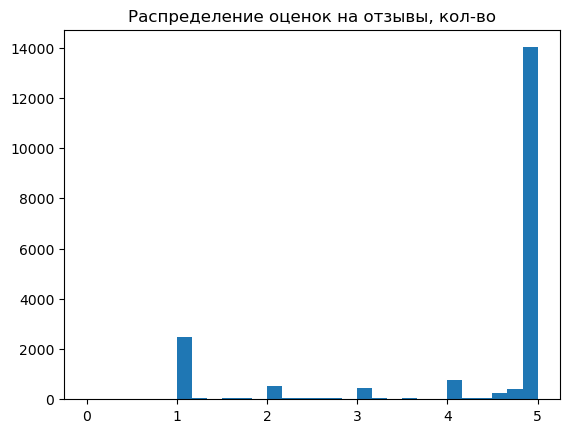

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df['rating'] = df['rating'].astype('float')
plt.title('Распределение оценок на отзывы, кол-во')
plt.hist(df['rating'], bins=30)
plt.show()

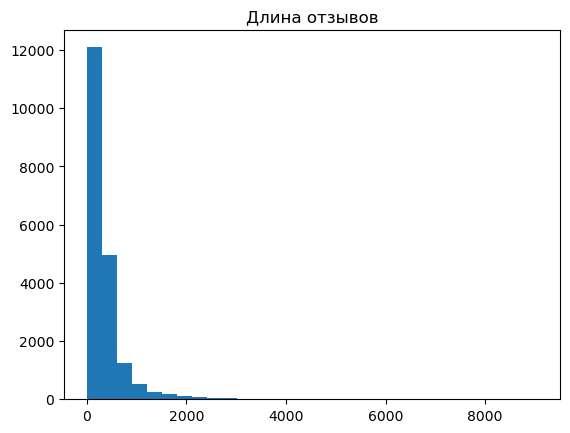

In [10]:
plt.title('Длина отзывов')
plt.hist(list(map(len, df['summary_fin'])), bins=30)
plt.show()

Людей, увлеченных писательством, не так много среди посетителей ресторанов - основная часть отзывов до 200 слов. Но есть и такие, кто написал более 8000 слов!!!

Преобразуем даты и посмотрим, как писались отзовы на сайте по времени.

In [11]:
import datetime
months = ["января", "февраля", "марта", "апреля", "мая", "июня", "июля", "августа", "сентября", "октября", "ноября",
              "декабря"]
def date_format(date):
    year = int(date.split(' ')[2])
    month = int(months.index(date.split(' ')[1]) + 1)
    day = int(date.split(' ')[0])
    return datetime.date(year, month, day)
df['date'] = df['date'].apply(date_format)  

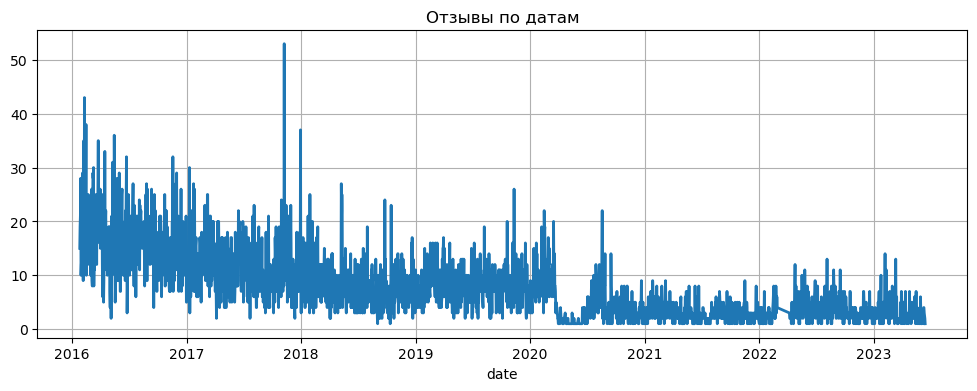

In [12]:
grouped_data = df.groupby('date')['user'].count()
grouped_data.plot(kind = 'line', figsize = (12,4), title = 'Отзывы по датам', grid = True, lw = 2)
plt.show()

На графике видно начало COVID и локдаун, резкий всплеск активности пользователей после снятия ограничений, потом стабилизация. Но уровень ниже до-ководного. Падение активности в начале 2022 года, скорее всего на фоне политической ситуации, затем стабилизация - чуть выше активность, чем в 2021, но ниже до-ковидных лет.

Посмотрим также, на какие рестораны посетители чаще всего оставляли отзывы. Первые две строчки в рейтинге - данные не прогрузились. Я оставлю их в датасете, так как дальше мне нужны будут только рейтинги и тексты отзывов.

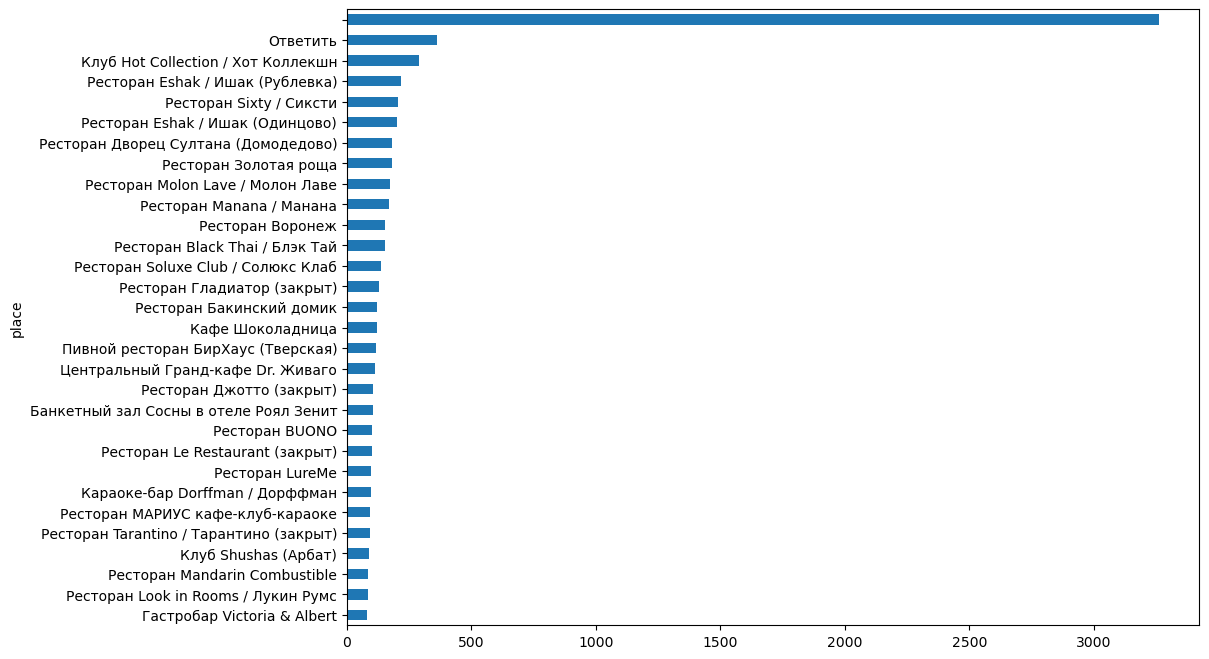

In [13]:
fig = plt.figure(figsize = (11,8))
most_popular = df.groupby('place')['user'].count().nlargest(30).sort_values()
most_popular.plot(kind = 'barh')
plt.show()

In [14]:
len(df[df['summary_fin'] == ''])

35

Удалим те строки, где нет отзыва и в итоге получим финальный датафрейм.

In [15]:
df = df[df['summary_fin'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19570 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user           19570 non-null  object 
 1   date           19570 non-null  object 
 2   rating         19570 non-null  float64
 3   place          19570 non-null  object 
 4   summary_short  19570 non-null  object 
 5   summary_full   19570 non-null  object 
 6   summary_fin    19570 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.2+ MB


## 2.2 Предобработка текста

Обработаем тектсы отзывов:
1. удалим цифры, стоп-слова и пунктуацию
2. токенизируем тексты
3. приведем в нормальную грамматическую форму

In [16]:
import string
import nltk
import re
import warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')
word_tokenizer = nltk.WordPunctTokenizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stop_words.extend(['просто','вообще','она', 'такой', 'который', 'данный', 'этот', 'её', 'этот',
                  'это','эта', 'очень', 'мой', 'твой', 'его', 'наш', 'их','браво', 'здравствуйте', 
                   'спасибо' ,'свой', 'один', 'ещё', 'всё'])

In [18]:
import pymorphy2 
morph = pymorphy2.MorphAnalyzer()

def tokenization(data):
    
    texts = []
    labels = []
    for indx, user, date, rating, place,summary_short, summmary_full, summary_fin in data.itertuples():
        text_lower = summary_fin.lower()
        text_lower = re.sub(r'[0-9]+', '', text_lower)
        text_lower = text_lower.replace('«','"')
        text_lower = text_lower.replace('»','"')
        tokens = word_tokenizer.tokenize(text_lower)
        tokens = [morph.parse(word)[0].normal_form for word in tokens]
        tokens = [word for word in tokens if(word not in string.punctuation and word not in stop_words)]
        texts.append(' '.join(tokens))
        labels.append(rating)
    
    return texts, labels

In [19]:
texts, labels = tokenization(df)

In [20]:
print(f'Texts length {len(texts)}')
print(f'Labels length {len(labels)}')

Texts length 19570
Labels length 19570


In [21]:
texts[456:458]

['праздничный атмосфера', 'атмосферный место']

Посмотрим частотность слов в текстах отзывов со всего датасета и только в отрицательных (рейтинг меньше 4).

Для расчета частотности будем пользоваться готовыми инструментами:

1. **WordCloud** - выделяет 200 максимально часто встречаемых слов и отображает более крупным шрифтом более частые слова во всем корпусе текстов.
2. **Bag-of-words** - подсчет частоты во всем корпусе текстов с помощью CountVectorizer (считаем по каждому слову в каждом отзыве, затем суммируем по каждому слову)
3. **Tf-Idf** - подсчет метрики для каждого слова с учетом важности для каждого отзыва. Посчитаем для каждого слова в каждом отзыве и сложим для каждого слова (хотя это не совсем верно, но будем считать, что слова с самой высокой суммой tf-idf по всем отзывам - самые важные для всего корпуса текста)

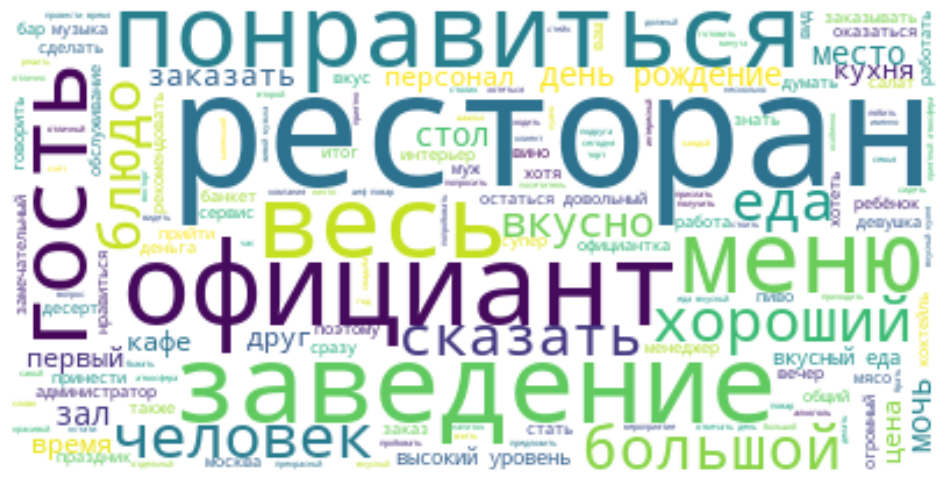

In [22]:
from wordcloud import WordCloud

wordcl = ' '.join(texts)

wordcloud = WordCloud(background_color="white").generate(wordcl)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(texts)
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())

word_count = counts.sum()
word_count.T.sort_values(ascending=False).head(20)

ресторан        12781
вкусный          5587
весь             5553
место            5328
хороший          5318
блюдо            5211
кухня            5092
официант         4586
еда              4188
понравиться      4034
заведение        3940
персонал         3869
обслуживание     3772
вкусно           3740
меню             3477
день             3287
большой          3147
гость            3002
отличный         2978
цена             2917
dtype: int64

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

tfidf_counts = pd.DataFrame(tfidf_matrix.toarray(),
                      columns=tfidf_vectorizer.get_feature_names())

tfidf_word_count = tfidf_counts.sum()
tfidf_word_count.T.sort_values(ascending=False).head(20)

ресторан        778.277227
вкусный         554.345691
хороший         551.866681
место           522.614627
кухня           500.639896
вкусно          493.092423
понравиться     476.617612
отличный        453.638760
обслуживание    420.677688
весь            420.019239
еда             419.579500
блюдо           416.043950
персонал        410.801093
заведение       353.395796
атмосфера       351.762601
приятный        350.293417
официант        342.239926
уютный          329.536249
цена            325.998775
меню            294.367868
dtype: float64

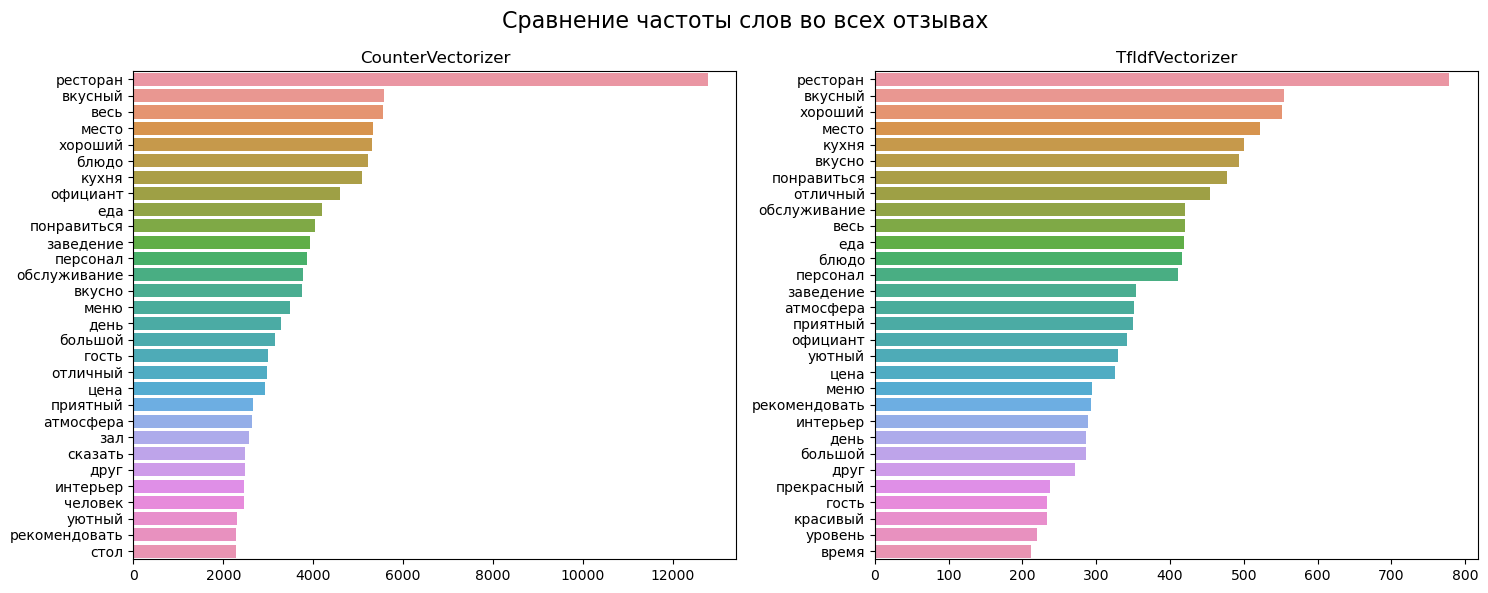

In [25]:
fig, axes = plt.subplots(1,2, figsize = (15,6))
most_frequent = word_count.T.sort_values()
sns.barplot(x = most_frequent.nlargest(30), y = most_frequent.nlargest(30).index, ax = axes[0])
axes[0].set_title('CounterVectorizer')

tfidf_most_frequent = tfidf_word_count.T.sort_values()
sns.barplot(x = tfidf_most_frequent.nlargest(30), y = tfidf_most_frequent.nlargest(30).index, ax = axes[1])
axes[1].set_title('TfIdfVectorizer')

plt.suptitle('Сравнение частоты слов во всех отзывах', fontsize = 16)
fig.tight_layout()
plt.show()

### Выводы по частотности:

Все 3 метода подобрали очень похожие слова, которые характеризуются высокой частотой во всех отзывах. С моей точки зрения, наверное метод TfiDf выбрал лучшие слова, которые характеризуют то, что ценят клиенты в ресторанах.

Посмотрим, есть ли отличия в частотности слов в отзывах с рейтингов ниже 4 (т.е. негативных).

In [26]:
negative_ind = []
for index,rating in enumerate(labels):
    if rating < 4:
        negative_ind.append(index)
len(negative_ind)

4021

In [27]:
negative_reviews = list(map(lambda i: texts[i], negative_ind))

In [28]:
negative_reviews[0:4]

['сегодня сделать заказ яндекс место ужин испортить настроение :((( картошка мундир бекон оказаться горький ребёнок ), бекон картошка дожарить взять пицца груша голубой плесень вкус корж отнюдь благородный плесень колбаса пепперони пицца пепперони соль блин видеть тесто деревянный полный ужас кухня сталкиваться',
 'отдыхать караоке зал июнь год забронировать столик проблема телефон приехать место выясниться место караоке некоторый время стоик наслать караоке зал гулять больший компания лесбиянка выглядеть вели омерзительно диджей постоянно пропускать очередь петь отказываться поднимать тональность звучание грубый выдержать дважды прийтись обращаться администратор помощь год посещать ресторан золотой вобла бывать адрес неоднократно обслуживание вопиять прецендент встречать просить принять мера подрывать репутация популярность ваш заведение',
 'шоколадница ул мясницкий зайти позавтракать долго мочь сделать заказ официант зал отсутствовать завтрак стоить руб насчитать сдача руб оказаться 

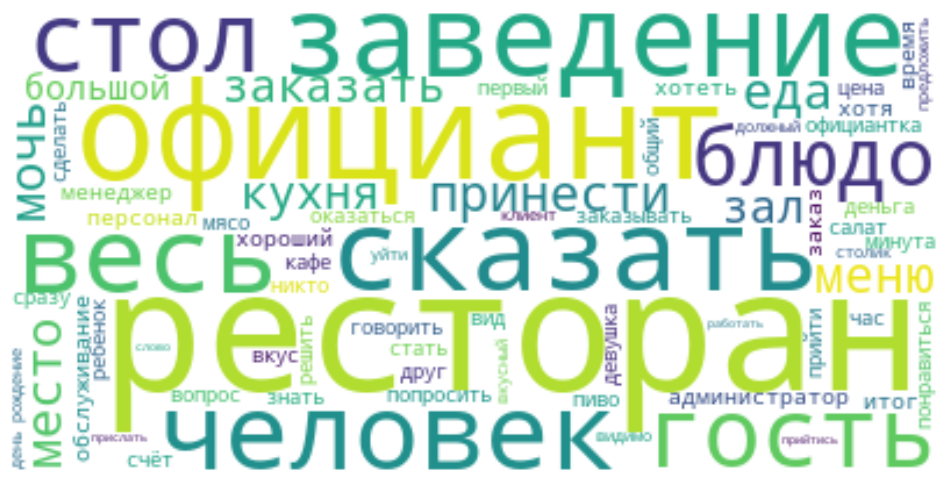

In [29]:
wordcl = ' '.join(negative_reviews)

wordcloud = WordCloud(background_color="white").generate(wordcl)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
neg_matrix = vectorizer.fit_transform(negative_reviews)
neg_counts = pd.DataFrame(neg_matrix.toarray(),
                      columns=vectorizer.get_feature_names())

neg_word_count = neg_counts.sum()
neg_word_count.T.sort_values(ascending=False).head(20)

ресторан        3677
официант        2020
заведение       1654
сказать         1454
блюдо           1374
стол            1372
принести        1341
весь            1312
человек         1227
место           1148
меню            1135
день            1134
еда             1084
заказ           1079
гость           1060
большой         1055
заказать        1023
обслуживание     933
мочь             932
хороший          859
dtype: int64

In [31]:
neg_tfidf_matrix = tfidf_vectorizer.fit_transform(negative_reviews)
neg_tfidf_counts = pd.DataFrame(neg_tfidf_matrix.toarray(),
                      columns=tfidf_vectorizer.get_feature_names())

neg_tfidf_word_count = neg_tfidf_counts.sum()
neg_tfidf_word_count.T.sort_values(ascending=False).head(20)

ресторан        154.032090
официант         97.012568
заведение        86.127193
обслуживание     77.059315
место            76.183784
блюдо            75.704881
еда              75.664604
отзыв            71.689424
принести         69.412927
стол             68.317383
сказать          67.941181
кухня            66.818329
большой          65.994061
весь             64.004760
заказ            63.820644
меню             63.406558
человек          62.307198
день             61.036642
хороший          59.817412
гость            59.521340
dtype: float64

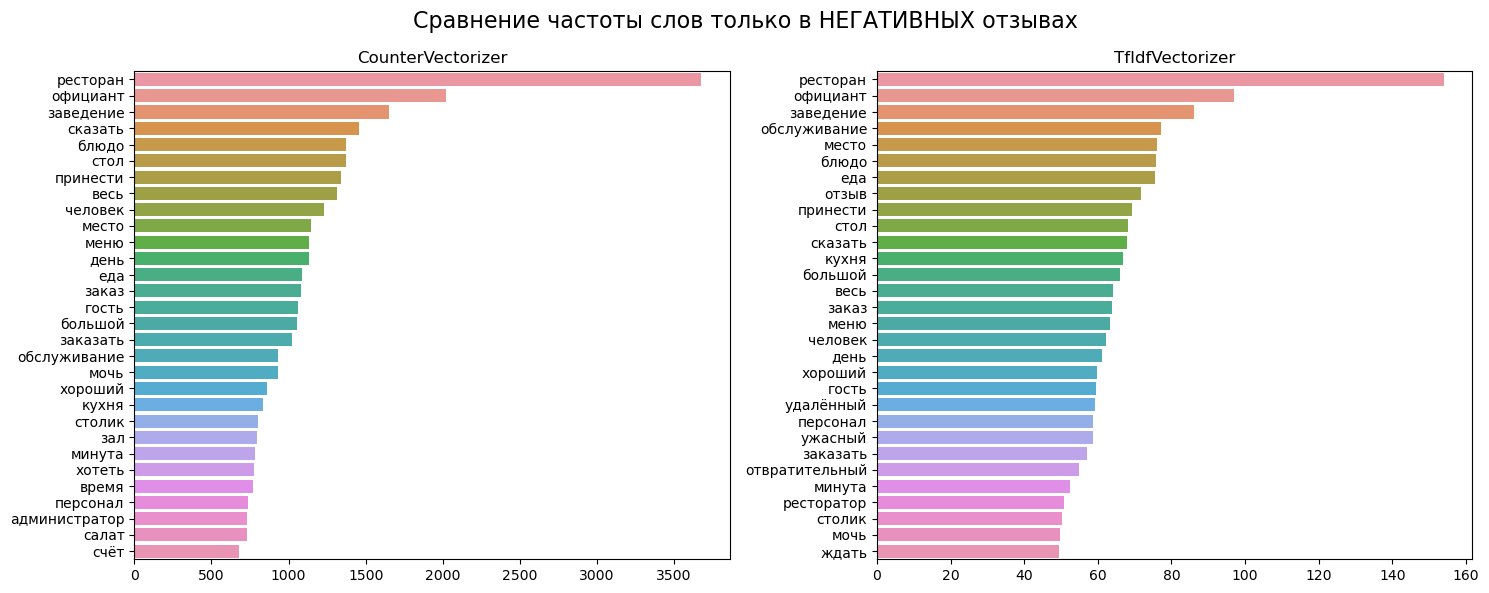

In [32]:
fig, axes = plt.subplots(1,2, figsize = (15,6))
neg_most_frequent = neg_word_count.T.sort_values()
sns.barplot(x = neg_most_frequent.nlargest(30), y = neg_most_frequent.nlargest(30).index, ax = axes[0])
axes[0].set_title('CounterVectorizer')

neg_tfidf_most_frequent = neg_tfidf_word_count.T.sort_values()
sns.barplot(x = neg_tfidf_most_frequent.nlargest(30), y = neg_tfidf_most_frequent.nlargest(30).index, ax = axes[1])
axes[1].set_title('TfIdfVectorizer')

plt.suptitle('Сравнение частоты слов только в НЕГАТИВНЫХ отзывах', fontsize = 16)
fig.tight_layout()
plt.show()

## Выводы по негативным отзывам:

Здесь картина не такая четкая. Очевидно, что посетителям может не нравится те же черты, которые могу и нравиться. Опять же, на мой взгляд, TfiDf сработал лучше, есть несколько эмоционально окрашенных слов: "ужасный", "отваритительный".